kgmyh@naver.com 으로 `이름_주유소가격 데이터 분석.html` 로 제출
- html 파일로 변환
    - File > Download as > HTML (.html) 선택

# 데이터 불러오기

- 2019년 주유소들의 일자별 가격 데이터
- https://www.opinet.co.kr/user/opdown/opDownload.do

In [1]:
# 상반기, 하반기 주유소 가격 데이터 조회
import pandas as pd

df1 = pd.read_csv('data/2022년_서울_상반기_일별_가격.csv', encoding='euc-kr')
df2 = pd.read_csv('data/2022년_서울_하반기_일별_가격.csv', encoding='euc-kr')

In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82689 entries, 0 to 82688
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      82689 non-null  object
 1   지역      82689 non-null  object
 2   상호      82689 non-null  object
 3   주소      82689 non-null  object
 4   기간      82689 non-null  int64 
 5   상표      82689 non-null  object
 6   셀프여부    82689 non-null  object
 7   고급휘발유   82689 non-null  int64 
 8   휘발유     82689 non-null  int64 
 9   경유      82689 non-null  int64 
 10  실내등유    82689 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 6.9+ MB


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81793 entries, 0 to 81792
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      81793 non-null  object
 1   지역      81793 non-null  object
 2   상호      81793 non-null  object
 3   주소      81793 non-null  object
 4   기간      81793 non-null  int64 
 5   상표      81793 non-null  object
 6   셀프여부    81793 non-null  object
 7   고급휘발유   81793 non-null  int64 
 8   휘발유     81793 non-null  int64 
 9   경유      81793 non-null  int64 
 10  실내등유    81793 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 6.9+ MB


In [4]:
# 상반기, 하반기 DataFrame 합치기
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220101,SK에너지,셀프,1887,1737,1587,0
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220102,SK에너지,셀프,1887,1737,1587,0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220103,SK에너지,셀프,1887,1737,1587,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220104,SK에너지,셀프,1887,1737,1587,0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220105,SK에너지,셀프,1887,1737,1587,0


In [5]:
# DataFrame 기본 정보 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164482 entries, 0 to 164481
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      164482 non-null  object
 1   지역      164482 non-null  object
 2   상호      164482 non-null  object
 3   주소      164482 non-null  object
 4   기간      164482 non-null  int64 
 5   상표      164482 non-null  object
 6   셀프여부    164482 non-null  object
 7   고급휘발유   164482 non-null  int64 
 8   휘발유     164482 non-null  int64 
 9   경유      164482 non-null  int64 
 10  실내등유    164482 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 13.8+ MB


In [6]:
# 상표 컬럼의 고유값 조회
df['상표'].unique()

array(['SK에너지', 'GS칼텍스', '현대오일뱅크', 'S-OIL', '알뜰주유소', '자가상표', '알뜰(ex)'],
      dtype=object)

In [7]:
# 지역 컬럼의 고유값 조회
df['지역'].unique()

array(['서울 강남구', '서울 강동구', '서울 강북구', '서울 강서구', '서울 관악구', '서울 광진구',
       '서울 구로구', '서울 금천구', '서울 노원구', '서울 도봉구', '서울 동대문구', '서울 동작구',
       '서울 마포구', '서울 서대문구', '서울 서초구', '서울 성동구', '서울 성북구', '서울 송파구',
       '서울 양천구', '서울 영등포구', '서울 용산구', '서울 은평구', '서울 종로구', '서울 중구',
       '서울 중랑구'], dtype=object)

> ### str accessor
> - `Series.str.String메소드()`
> - 문자열 타입 Series에 String 메소드들을 사용하여 일괄처리 할 수 있도록 한다.
> - str accessor 메소드 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-str

> ### datetime으로 변환
> - `pd.to_datetime(변환할 Series, format="날짜형식")`
> - x 또는 y 축이 날짜 일 경우 datetime 타입으로 처리하는 것이 좋다.
> - format: 년월일의 형식을 strftime 형식문자열로 지정한다. 
>      - [strftime 형식](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)  
> - datetime을 변환하면 날짜만의 기능을 다룰 수 있다.
>     - dt accessor를 이용해 datetime의 속성값들을(년, 월, 일 등) 추출할 수 있다.
>     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html


In [8]:
# 지역 컬럼의 값을 이용하여 "구" 컬럼 생성 (지역에서 구만 추출해서 파생변수컬럼 생성)
df['구'] = df.지역.str.split(' ').str[1]
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220101,SK에너지,셀프,1887,1737,1587,0,강남구
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220102,SK에너지,셀프,1887,1737,1587,0,강남구
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220103,SK에너지,셀프,1887,1737,1587,0,강남구
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220104,SK에너지,셀프,1887,1737,1587,0,강남구
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220105,SK에너지,셀프,1887,1737,1587,0,강남구


In [9]:
# 기간 컬럼을 datetime 타입으로 변경
df['기간'] = pd.to_datetime(df['기간'], format='%Y%m%d')
df['기간']

0        2022-01-01
1        2022-01-02
2        2022-01-03
3        2022-01-04
4        2022-01-05
            ...    
164477   2022-12-27
164478   2022-12-28
164479   2022-12-29
164480   2022-12-30
164481   2022-12-31
Name: 기간, Length: 164482, dtype: datetime64[ns]

In [10]:
# 기간 컬럼을 이용해 "월", "일", "요일" 컬럼 생성 (dt accessor 이용)
from datetime import datetime

df['월'] = df['기간'].dt.month
df['일'] = df['기간'].dt.day
df['요일'] = df['기간'].dt.weekday
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,5
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,6
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,1
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,2


In [11]:
# 요일 - 0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일 로 변경
weekday_list = '월화수목금토일'
df['요일']=df.apply(lambda x : weekday_list[x['요일']], axis = 1)

In [12]:
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,토
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,일
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,월
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,화
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,수


In [13]:
# 휘발유 가격이 가장 비싼 5개 행 조회
df.sort_values('휘발유').tail(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78937,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-24,SK에너지,일반,3496,3096,3223,2719,중구,6,24,금
78938,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-25,SK에너지,일반,3496,3096,3223,2719,중구,6,25,토
78939,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-26,SK에너지,일반,3496,3096,3223,2719,중구,6,26,일
78940,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-27,SK에너지,일반,3496,3096,3223,2719,중구,6,27,월
78935,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-22,SK에너지,일반,3496,3096,3223,2719,중구,6,22,수


In [14]:
# 휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df[df['휘발유'] != 0].sort_values('휘발유').head(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
99498,A0000519,서울 강서구,화곡역주유소,서울 강서구 강서로 154 (화곡동),2022-12-27,알뜰주유소,셀프,0,1410,1660,0,강서구,12,27,화
97839,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-24,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,24,토
97840,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-25,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,25,일
148433,A0001005,서울 양천구,현대주유소,서울 양천구 남부순환로 372 (신월동),2022-12-26,S-OIL,셀프,0,1410,1660,0,양천구,12,26,월
97838,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-23,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,23,금


In [15]:
# 고급휘발유 가격이 가장 비싼 5개 행 조회
df.sort_values('고급휘발유').tail(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78939,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-26,SK에너지,일반,3496,3096,3223,2719,중구,6,26,일
78938,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-25,SK에너지,일반,3496,3096,3223,2719,중구,6,25,토
78936,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-23,SK에너지,일반,3496,3096,3223,2719,중구,6,23,목
78935,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-22,SK에너지,일반,3496,3096,3223,2719,중구,6,22,수
78937,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-24,SK에너지,일반,3496,3096,3223,2719,중구,6,24,금


In [16]:
# 고급휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df[df['고급휘발유'] != 0].sort_values('고급휘발유').head(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
98571,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-20,S-OIL,셀프,1599,1527,1787,0,강서구,12,20,화
98572,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-21,S-OIL,셀프,1599,1499,1759,0,강서구,12,21,수
98573,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-22,S-OIL,셀프,1599,1499,1759,0,강서구,12,22,목
98574,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-23,S-OIL,셀프,1599,1499,1729,0,강서구,12,23,금
98575,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-24,S-OIL,셀프,1599,1499,1729,0,강서구,12,24,토


In [17]:
# 경유 가격이 가장 비싼 5개 행 조회
df.sort_values('경유').tail(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
160621,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-07-04,SK에너지,일반,3481,3081,3230,2703,중구,7,4,월
160620,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-07-03,SK에너지,일반,3481,3081,3230,2703,중구,7,3,일
160619,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-07-02,SK에너지,일반,3481,3081,3230,2703,중구,7,2,토
78943,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-30,SK에너지,일반,3481,3081,3230,2703,중구,6,30,목
78941,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-28,SK에너지,일반,3481,3081,3230,2703,중구,6,28,화


In [18]:
# 경유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df[df['경유'] != 0].sort_values('경유').head(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
45209,A0011826,서울 서초구,만남의광장주유소,서울 서초구 양재대로12길 73-71,2022-01-16,알뜰(ex),셀프,0,1565,1367,0,서초구,1,16,일
12343,A0004657,서울 강서구,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2022-01-11,알뜰주유소,일반,0,1547,1377,0,강서구,1,11,화
12344,A0004657,서울 강서구,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2022-01-12,알뜰주유소,일반,0,1547,1377,0,강서구,1,12,수
12345,A0004657,서울 강서구,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2022-01-13,알뜰주유소,일반,0,1547,1377,0,강서구,1,13,목
16318,A0000519,서울 강서구,화곡역주유소,서울 강서구 강서로 154 (화곡동),2022-01-06,알뜰주유소,셀프,0,1547,1377,0,강서구,1,6,목


In [19]:
# 상표별 휘발유 평균가격 조회
df_mean1=df.groupby('상표')['휘발유'].mean()
df_mean1

상표
GS칼텍스     1904.899429
S-OIL     1859.282595
SK에너지     1908.900823
알뜰(ex)    1759.884932
알뜰주유소     1767.914672
자가상표      1823.622795
현대오일뱅크    1839.447215
Name: 휘발유, dtype: float64

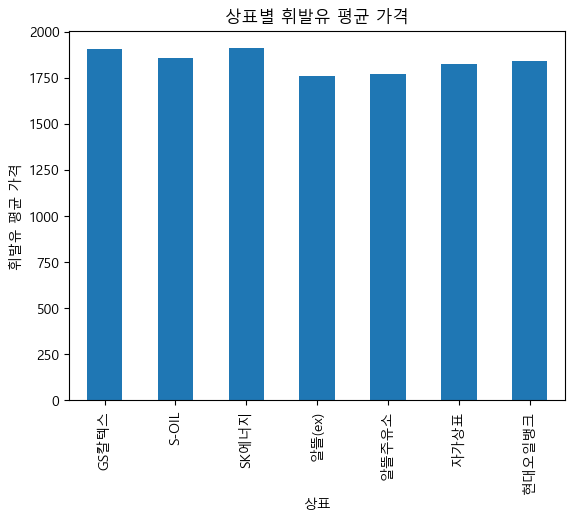

In [20]:
# 상표별 휘발유 평균가격 시각화
import matplotlib.pyplot as plt
df_mean1.plot(kind='bar', title='상표별 휘발유 평균 가격', xlabel='상표', ylabel='휘발유 평균 가격')
plt.show()

In [21]:
# 셀프주유소와 일반주유소 개수 확인
df['셀프여부'].value_counts()

셀프    92478
일반    72004
Name: 셀프여부, dtype: int64

In [22]:
# 셀프 여부에 따른 휘발유 평균 가격 비교 
df.groupby('셀프여부')['휘발유'].mean()

셀프여부
셀프    1818.216376
일반    1953.870993
Name: 휘발유, dtype: float64

In [23]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교
df_mean2 = df.pivot_table(index='상표', columns='셀프여부', values='휘발유', aggfunc='mean')
df_mean2

셀프여부,셀프,일반
상표,,
GS칼텍스,1825.849350,2001.420217
S-OIL,1820.122748,1932.115939
SK에너지,1826.717027,2003.229520
알뜰(ex),1759.884932,NaN
알뜰주유소,1754.261378,1796.201557
자가상표,2017.000000,1821.768493
현대오일뱅크,1807.265898,1877.606059


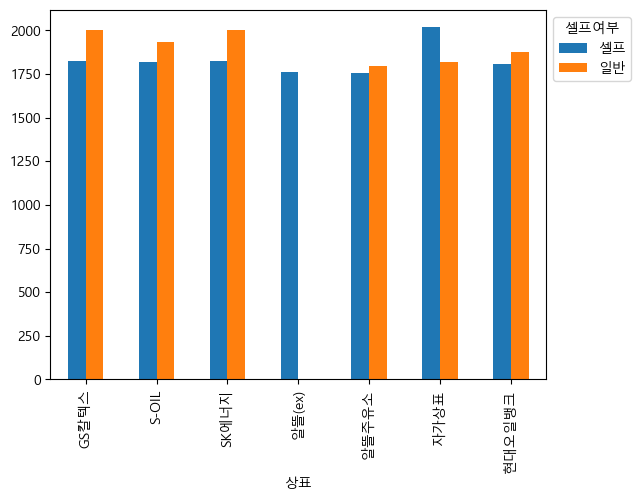

In [27]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교 시각화
df_mean2.plot(kind='bar')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='셀프여부')
plt.show()

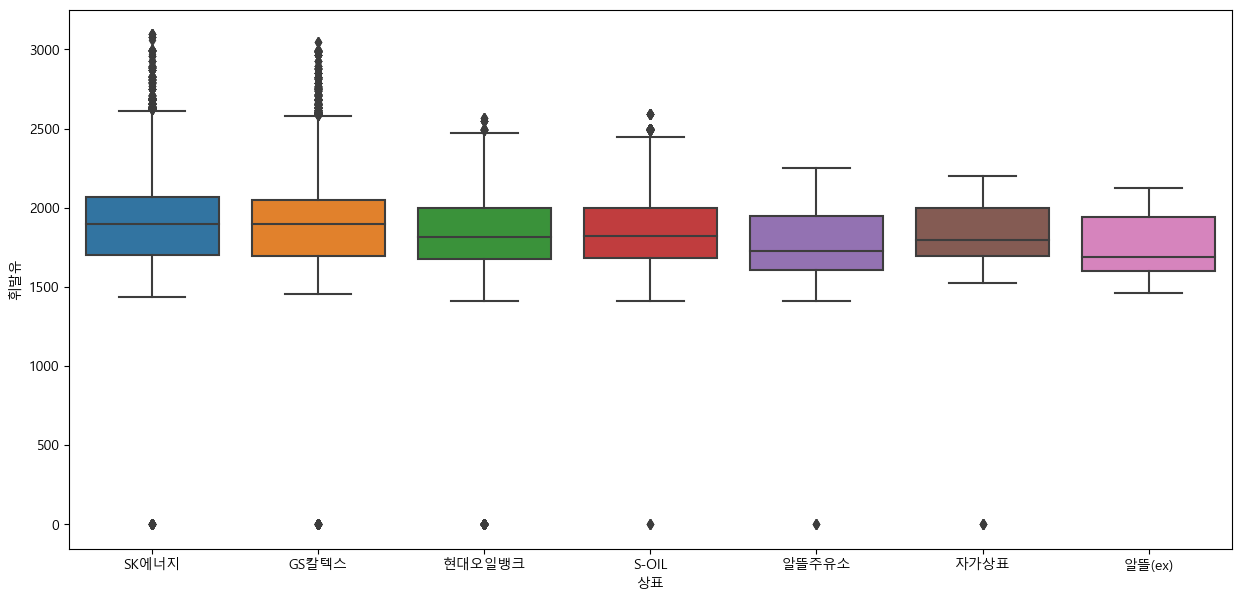

In [25]:
# 상표별 휘발유 가격의 분포를 boxplot으로 시각화
import seaborn as sns
plt.figure(figsize = (15, 7))
sns.boxplot(data=df, x='상표', y='휘발유')
plt.show()

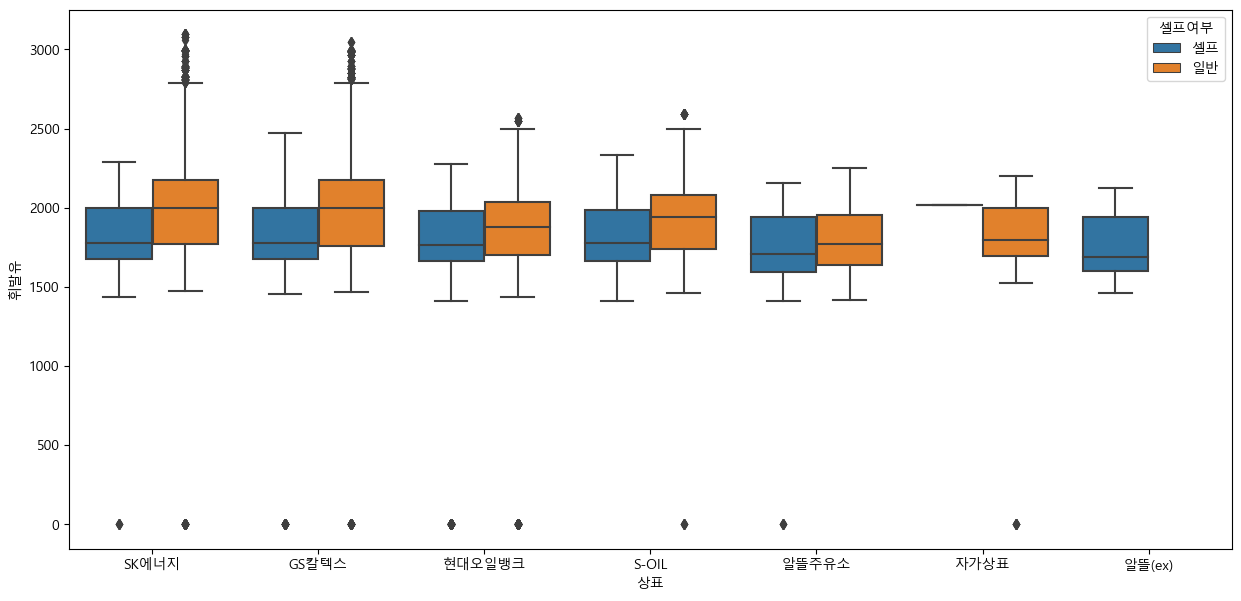

In [26]:
# 상표별 일반/셀프 주유소의 휘발유 가격에 대한 분포 확인 - boxplot으로 시각화
plt.figure(figsize = (15, 7))
sns.boxplot(data=df, x='상표', y='휘발유', hue='셀프여부')
plt.show()

In [28]:
# 구별 휘발유 가격의 평균
result = df.groupby('구')['휘발유'].mean()
result

구
강남구     2024.210946
강동구     1910.691977
강북구     1787.319507
강서구     1829.297928
관악구     1851.051724
광진구     1818.287644
구로구     1864.676733
금천구     1799.263339
노원구     1845.411765
도봉구     1800.197597
동대문구    1825.329176
동작구     1836.980792
마포구     1880.027429
서대문구    1818.858735
서초구     1902.345027
성동구     1923.009324
성북구     1805.115935
송파구     1843.436830
양천구     1799.875541
영등포구    1863.848380
용산구     2203.392495
은평구     1821.937317
종로구     2129.215029
중구      2149.957178
중랑구     1805.788631
Name: 휘발유, dtype: float64

In [29]:
# 평균 가격이 가장 높은 구의 상표별 휘발유 평균가격
df[df['구'] == result.idxmax()].groupby('상표')['휘발유'].mean()

상표
GS칼텍스     2386.086653
SK에너지     2245.048402
현대오일뱅크    2013.058905
Name: 휘발유, dtype: float64

In [30]:
# 월 평균 휘발유 가격
df.groupby('월')['휘발유'].mean()

월
1     1704.975625
2     1781.803959
3     2007.941288
4     2030.140766
5     2027.255552
6     2151.490272
7     2082.667822
8     1858.737602
9     1799.546203
10    1737.285143
11    1715.447874
12    1627.068857
Name: 휘발유, dtype: float64

In [31]:
# 각 구의 월별 평균 휘발유 가격 
df_mean3 = df.pivot_table(index='월', columns='구', values='휘발유', aggfunc='mean')
df_mean3

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
월,,,,,,,,,,,,,,,,,,,,,
1,1845.037951,1732.289294,1599.384615,1657.352823,1693.370370,1643.827586,1679.963134,1643.854839,1671.234914,1613.964158,...,1734.804554,1632.611559,1678.787909,1633.020645,1700.583035,2046.389578,1641.127016,1924.910394,2002.511401,1624.843318
2,1914.714286,1797.400510,1692.991758,1744.524554,1767.613811,1733.171838,1754.278912,1718.961310,1749.078571,1702.603175,...,1810.227848,1715.837798,1741.297991,1711.940000,1777.378486,2119.343407,1714.379464,1995.059524,2073.921429,1714.377551
3,2109.476510,2020.053118,1954.910670,1968.371976,1992.619816,1965.270968,2005.556068,1947.865889,1981.651613,1964.155009,...,2042.379507,1961.168011,1967.725806,1943.258065,2006.050179,2266.325062,1956.024194,2193.612000,2235.391586,1948.587963
4,2138.078788,2075.559524,1968.938462,1994.076042,2012.595238,1975.047281,2035.069467,1948.887879,2007.235556,1974.970894,...,2078.880392,1978.133333,2001.121212,1962.068091,2035.384123,2267.592308,1984.841667,2230.095833,2182.416667,1977.856802
5,2137.114674,2055.983871,1946.035230,1989.009073,1986.184758,1959.891705,2015.151613,1941.687316,2007.703226,1958.483871,...,2060.633776,1957.707586,1991.337796,1954.148387,2027.461722,2387.131514,1966.931452,2252.173387,2325.951613,1954.359903
6,2273.512745,2174.080952,2077.157576,2118.266180,2117.292857,2096.482014,2132.770000,2081.944444,2117.348889,2086.650000,...,2190.382353,2088.650725,2115.770721,2084.834446,2143.571605,2471.287179,2087.960417,2350.654167,2434.632997,2076.310256
7,2223.274194,2125.896313,1976.936986,2037.915992,2061.854839,2018.152074,2078.689935,1998.354839,2070.651613,2002.050403,...,2139.177645,2012.291961,2056.817227,2004.267097,2056.821983,2381.947631,2028.060484,2327.391129,2331.203226,2022.888337
8,2013.865275,1910.246544,1756.037634,1814.660137,1829.476959,1785.532258,1854.947798,1788.944282,1829.000000,1774.889113,...,1915.363071,1772.318373,1826.300000,1773.624516,1836.010778,2165.801489,1804.530242,2158.129032,2137.106452,1773.062035
9,1965.875000,1829.524038,1692.447222,1744.274747,1778.404306,1734.718670,1786.936667,1731.793939,1767.555556,1712.797917,...,1848.378661,1709.307246,1758.666667,1715.977303,1767.259305,2130.389744,1738.691667,2110.458333,2100.513333,1717.466667


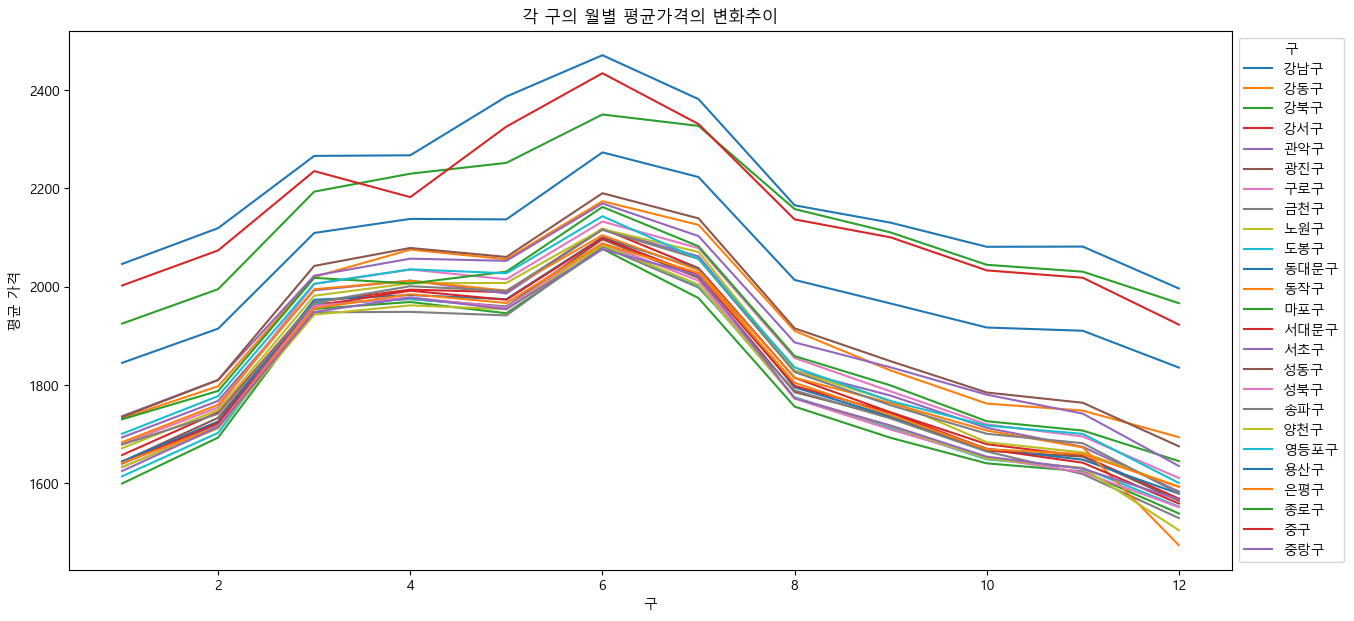

In [32]:
# 각 구의 월별 평균가격의 변화추이 시각화
df_mean3.plot(kind='line', figsize=(15, 7), title='각 구의 월별 평균가격의 변화추이', xlabel = '구', ylabel='평균 가격' )
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='구')
plt.show()

In [109]:
# 가장 휘발유가격이 비싼 주유소 상위 5 - (같은 주유소가 여러개 나오므로 가장 비싼 가격을 기준으로 집계)
sorted_value = df[df['휘발유']!=0].groupby('상호')['휘발유'].max().sort_values(ascending=False)
sorted_value[:5]

상호
서남주유소     3096
서계주유소     3050
필동주유소     2789
동자동주유소    2690
한석주유소     2681
Name: 휘발유, dtype: int64

In [110]:
# 가장 휘발유가격이 저렴한 주유소 상위 5 - (같은 주유소가 여러개 나오므로 가장 비싼 가격을 기준으로 집계)
sorted_value[-5:]

상호
오션네트웍스(주) 서울식물원지점    1940
정다운셀프주유소             1759
(주)명보에너지             1755
송파알찬주유소              1690
(주)동원석유              1654
Name: 휘발유, dtype: int64

In [35]:
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,토
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,일
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,월
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,화
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,수


In [ ]:
drop_duplicates(['상호', '지역', '주소']).head()

In [106]:
# 휘발유 비싼 주유소의 상위 5개의 상호, 지역, 주소 조회(중복제거-drop_duplicates)
df.sort_values(['휘발유'], ascending=False).drop_duplicates(['상호', '지역', '주소']).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78935,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-22,SK에너지,일반,3496,3096,3223,2719,중구,6,22,수
72549,A0000925,서울 용산구,서계주유소,서울 용산구 청파로 367 (청파동),2022-06-28,GS칼텍스,일반,3450,3050,3025,0,용산구,6,28,화
80019,A0009047,서울 중구,필동주유소,서울 중구 퇴계로 196 (필동2가),2022-06-23,GS칼텍스,일반,2999,2789,2959,2349,중구,6,23,목
72360,A0000223,서울 용산구,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2022-06-20,SK에너지,일반,2990,2690,2680,1890,용산구,6,20,월
73266,A0000221,서울 용산구,한석주유소,서울 용산구 이촌로 164,2022-06-21,SK에너지,일반,2964,2681,2893,0,용산구,6,21,화


In [107]:
# 휘발유 저렴한 주유소의 상위 5개의 상호, 지역, 주소 조회(중복제거)
df[df['휘발유'] != 0].sort_values(['휘발유']).drop_duplicates(['상호', '지역', '주소']).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
99498,A0000519,서울 강서구,화곡역주유소,서울 강서구 강서로 154 (화곡동),2022-12-27,알뜰주유소,셀프,0,1410,1660,0,강서구,12,27,화
97839,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-24,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,24,토
148433,A0001005,서울 양천구,현대주유소,서울 양천구 남부순환로 372 (신월동),2022-12-26,S-OIL,셀프,0,1410,1660,0,양천구,12,26,월
95298,A0004657,서울 강서구,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2022-12-22,알뜰주유소,일반,0,1415,1665,0,강서구,12,22,목
96218,A0000582,서울 강서구,목화주유소,서울 강서구 국회대로 251 (화곡동),2022-12-22,알뜰주유소,셀프,0,1430,1670,0,강서구,12,22,목


In [39]:
# 고급 휘발유를 가장 많이 파는 구 조회
df.groupby('구')['고급휘발유'].count().sort_values()[-1:]

구
강남구    12278
Name: 고급휘발유, dtype: int64

In [40]:
###############################################################################
# 주유소 가격 데이터를 이용해서 알고 싶은 정보들을 추가 분석해 보세요.
###############################################################################


In [41]:
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,토
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,일
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,월
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,화
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,수


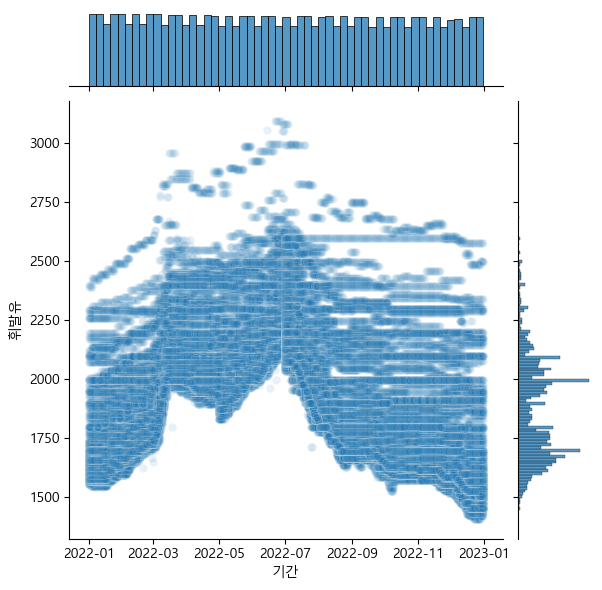

In [42]:
# 2022년 한해 기간별 휘발유 가격 시각화, 0은 제외

import seaborn as sns
sns.jointplot(data = df[df['휘발유']!=0], x = '기간', y = '휘발유', alpha=0.1)
plt.show()

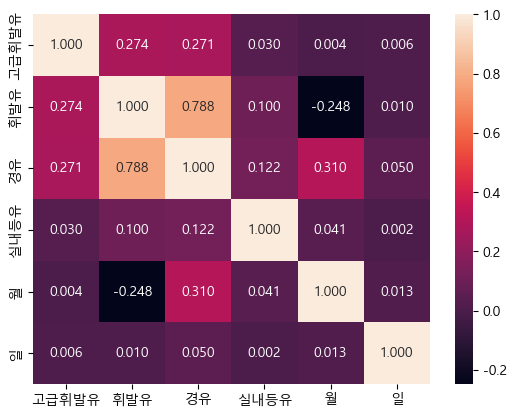

In [43]:
# 전체 데이터 간의 연관성 체크
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.3f')
plt.show()

# 경유와 휘발유 가격의 값이 0.788 유사도를 보여주었다

In [96]:
# 각 기름 월별 평균 가격 변화 추이

d1 = pd.DataFrame(df.groupby('월')['휘발유'].mean())
d2 = pd.DataFrame(df.groupby('월')['경유'].mean())
d3 = pd.DataFrame(df.groupby('월')['고급휘발유'].mean())
d4 = pd.DataFrame(df.groupby('월')['실내등유'].mean())
df2 = d1.join([d2, d3, d4])
df2

,휘발유,경유,고급휘발유,실내등유
월,,,,
1,1704.975625,1535.483819,964.660625,474.240000
2,1781.803959,1614.061547,997.969804,486.872285
3,2007.941288,1904.697331,1101.154768,537.681987
4,2030.140766,1966.453188,1123.140107,549.244418
5,2027.255552,2018.344175,1121.716292,542.448058
6,2151.490272,2151.390980,1193.652628,532.349832
7,2082.667822,2135.156956,1193.139918,542.026568
8,1858.737602,1944.948964,1105.437523,474.385548
9,1799.546203,1918.356678,1087.241601,533.473027


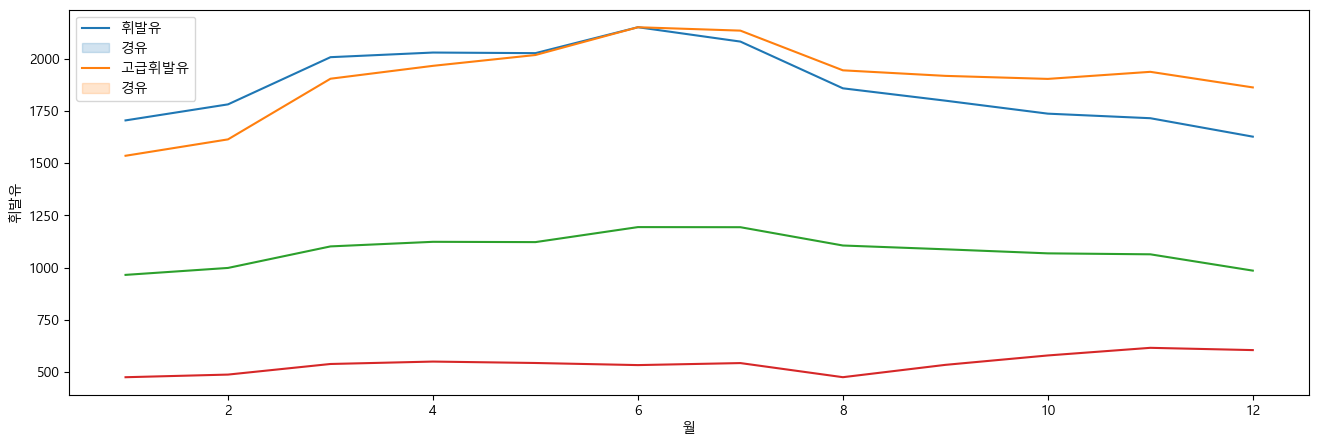

In [94]:
plt.figure(figsize=(16, 5))
sns.lineplot(data=df2, y='휘발유', x=df2.index)
sns.lineplot(data=df2, y='경유', x=df2.index)
sns.lineplot(data=df2, y='고급휘발유', x=df2.index)
sns.lineplot(data=df2, y='실내등유', x=df2.index)
plt.legend(['휘발유', '경유', '고급휘발유', '경유'])
plt.show()